# Principal Component Analysis with Cancer Data

In [212]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [213]:
bc_df = pd.read_csv("breast-cancer-wisconsin-data.csv") 
bc_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [214]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [215]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [216]:
bc_df.shape

(699, 11)

In [217]:
bc_df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [218]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [219]:
bc_df["Bare Nuclei"].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [220]:
bc_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [221]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [222]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [223]:
bc_df['Bare Nuclei'].mode()[0]

'1'

In [224]:
bc_df['Bare Nuclei'].replace('?', bc_df['Bare Nuclei'].mode()[0], inplace=True)

In [225]:
bc_df["Bare Nuclei"].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [226]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int64')

In [227]:
bc_df.drop_duplicates(keep=False,inplace=True) 

In [228]:
bc_df.shape

(681, 11)

In [229]:
bc_df.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
ID,681.0,1.076003e+06,622171.149803,61634.0,877943.0,1171845.0,1238633.0,13454352.0
ClumpThickness,681.0,4.440529e+00,2.819011,1.0,2.0,4.0,6.0,10.0
Cell Size,681.0,3.132159e+00,3.033176,1.0,1.0,1.0,5.0,10.0
Cell Shape,681.0,3.201175e+00,2.949436,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,681.0,2.848752e+00,2.880314,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,681.0,3.209985e+00,2.187186,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,681.0,3.478708e+00,3.612059,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,681.0,3.434655e+00,2.449893,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,681.0,2.904552e+00,3.081920,1.0,1.0,1.0,4.0,10.0
Mitoses,681.0,1.599119e+00,1.733561,1.0,1.0,1.0,1.0,10.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [230]:
# Check for correlation of variable

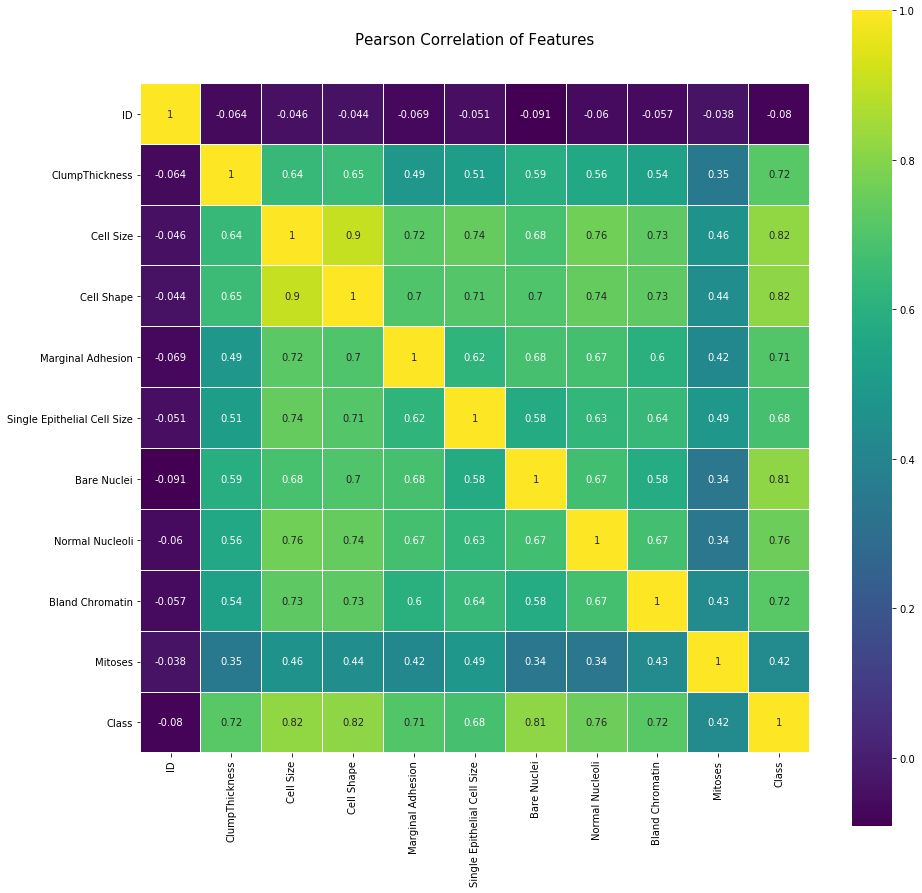

In [231]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(bc_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [232]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [233]:
#Let us check for pair plots

C:\Users\kramesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kramesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


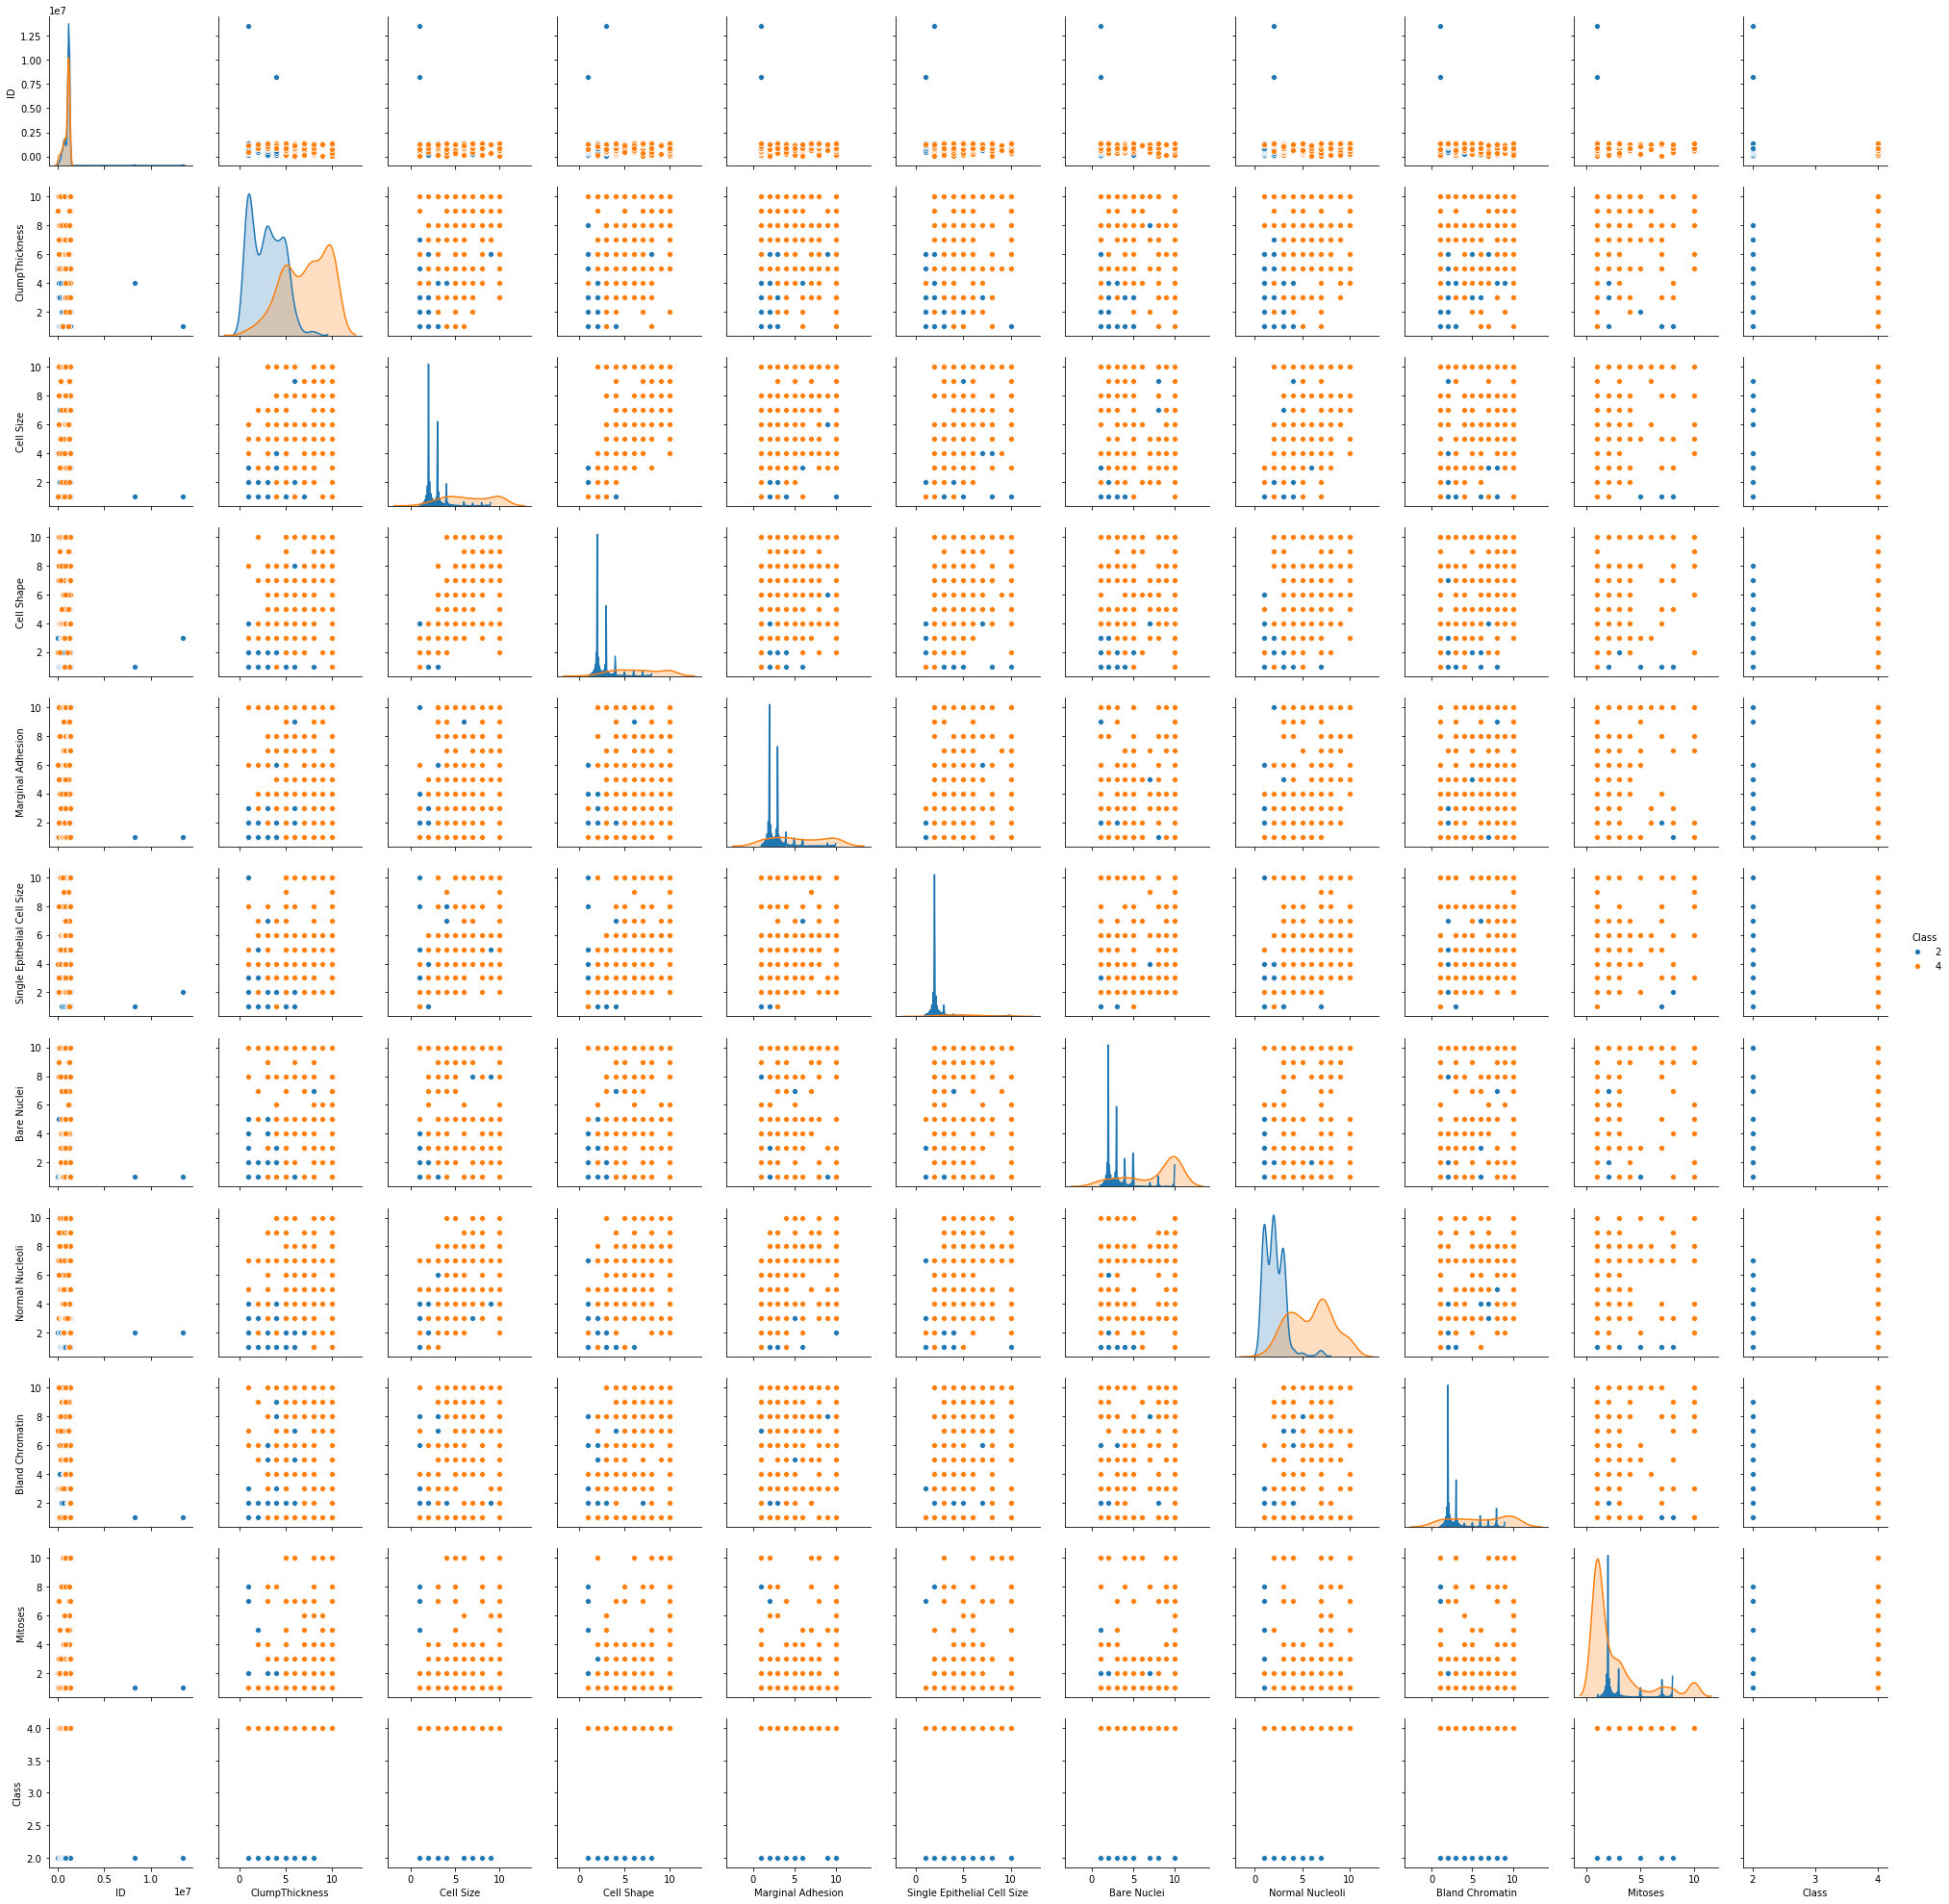

In [234]:
sns.pairplot(data=bc_df,hue = 'Class')

In [235]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [236]:
# We could see most of the outliers are now removed.

In [237]:
ind_col = list(bc_df.drop(['Class','ID'], axis=1).columns)
ind_col

['ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses']

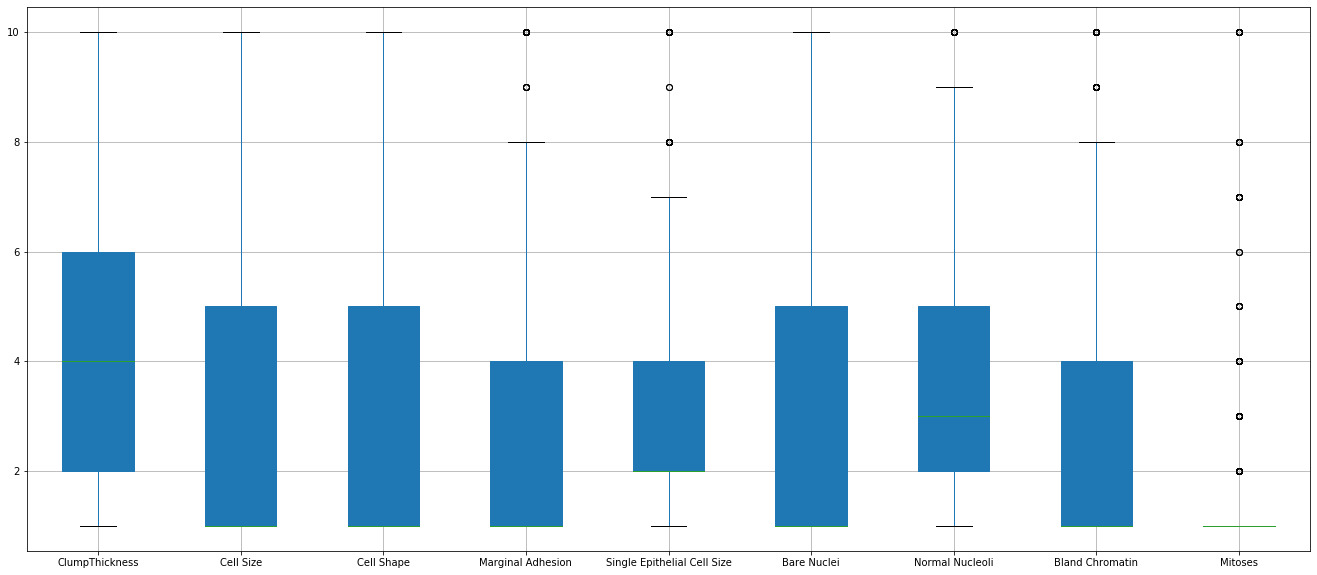

In [238]:
bc_df.boxplot(column=ind_col,figsize=(23,10),patch_artist=True)

In [239]:
pd.crosstab(bc_df['Marginal Adhesion'],bc_df['Class'])

Class,2,4
Marginal Adhesion,,
1,363,30
2,37,17
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [240]:
Q1_MA = bc_df['Marginal Adhesion'].quantile(0.25)
Q3_MA = bc_df['Marginal Adhesion'].quantile(0.75)
IQR_MA = Q3_MA - Q1_MA

In [241]:
print("\nLower Whisker value in Marginal Adhesion column is", (Q1_MA - 1.5 * IQR_MA))
print("\nUpper Whisker value in Marginal Adhesion column is", (Q3_MA + 1.5 * IQR_MA))


Lower Whisker value in Marginal Adhesion column is -3.5

Upper Whisker value in Marginal Adhesion column is 8.5


In [242]:
print("Number of outliers in Marginal Adhesion column are", ((bc_df['Marginal Adhesion'] < (Q1_MA - 1.5 * IQR_MA)) | (bc_df['Marginal Adhesion'] > (Q3_MA + 1.5 * IQR_MA))).sum())

Number of outliers in Marginal Adhesion column are 60


In [243]:
bc_df['Marginal Adhesion'][(bc_df['Marginal Adhesion'] < (Q1_MA - 1.5 * IQR_MA)) | (bc_df['Marginal Adhesion'] > (Q3_MA + 1.5 * IQR_MA))]

14     10
20     10
38      9
40      9
73     10
99     10
104    10
107    10
112    10
117    10
132    10
167    10
173    10
187    10
188    10
191    10
205     9
210    10
213    10
214    10
251    10
260    10
263    10
264    10
282    10
284    10
285    10
286    10
304     9
312    10
323    10
348    10
353    10
360    10
361    10
366    10
367    10
425    10
440    10
479    10
482    10
487    10
488    10
493    10
494    10
506    10
514    10
523    10
546    10
565    10
569    10
586    10
588     9
608    10
610    10
611    10
612    10
648    10
680    10
681    10
Name: Marginal Adhesion, dtype: int64

In [244]:
bc_df['Marginal Adhesion']=np.where(bc_df['Marginal Adhesion']>(Q3_MA + 1.5 * IQR_MA),Q3_MA,bc_df['Marginal Adhesion'])

In [245]:
bc_df['Marginal Adhesion']=np.where(bc_df['Marginal Adhesion']<(Q1_MA - 1.5 * IQR_MA),Q1_MA,bc_df['Marginal Adhesion'])

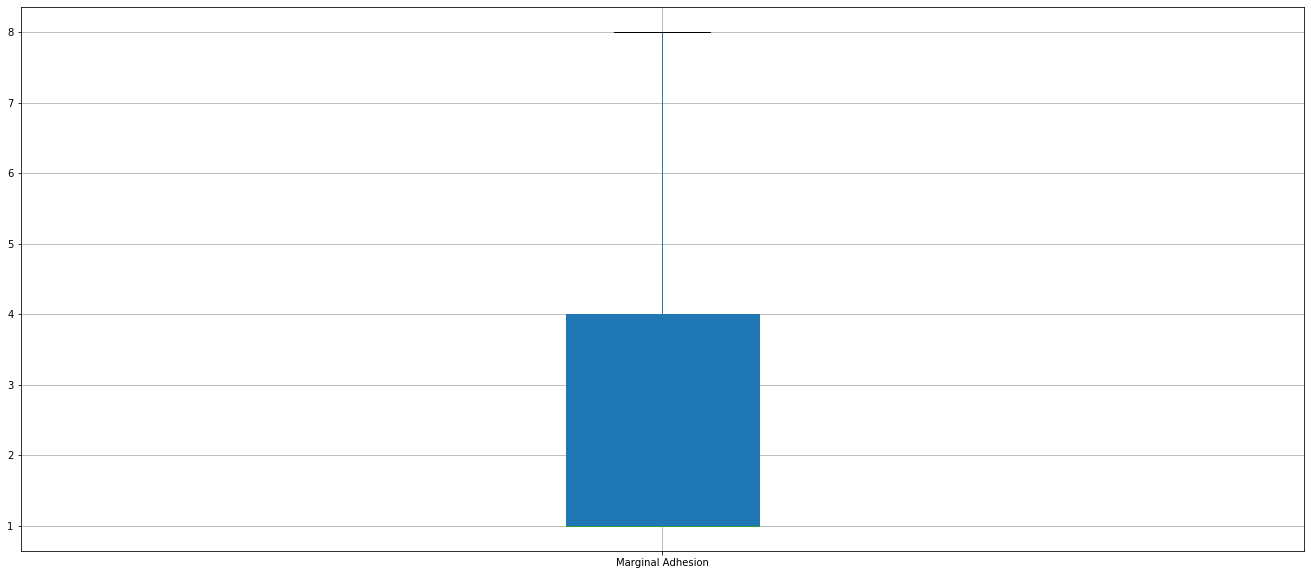

In [246]:
bc_df.boxplot(column=['Marginal Adhesion'],figsize=(23,10),patch_artist=True)

In [247]:
pd.crosstab(bc_df['Single Epithelial Cell Size'],bc_df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,42,1
2,355,23
3,29,41
4,7,41
5,5,34
6,2,39
7,3,9
8,2,17
9,0,2


In [248]:
Q1_SECS = bc_df['Single Epithelial Cell Size'].quantile(0.25)
Q3_SECS = bc_df['Single Epithelial Cell Size'].quantile(0.75)
IQR_SECS = Q3_SECS - Q1_SECS

In [249]:
print("\nLower Whisker value in Single Epithelial Cell Size column is", (Q1_SECS - 1.5 * IQR_SECS))
print("\nUpper Whisker value in Single Epithelial Cell Size column is", (Q3_SECS + 1.5 * IQR_SECS))


Lower Whisker value in Single Epithelial Cell Size column is -1.0

Upper Whisker value in Single Epithelial Cell Size column is 7.0


In [250]:
print("Number of outliers in Single Epithelial Cell Size column are", ((bc_df['Single Epithelial Cell Size'] < (Q1_SECS - 1.5 * IQR_SECS)) | (bc_df['Single Epithelial Cell Size'] > (Q3_SECS + 1.5 * IQR_SECS))).sum())

Number of outliers in Single Epithelial Cell Size column are 50


In [251]:
bc_df['Single Epithelial Cell Size']=np.where(bc_df['Single Epithelial Cell Size']>(Q3_SECS + 1.5 * IQR_SECS),Q3_SECS,bc_df['Single Epithelial Cell Size'])

In [252]:
bc_df['Single Epithelial Cell Size']=np.where(bc_df['Single Epithelial Cell Size']<(Q1_SECS - 1.5 * IQR_SECS),Q1_SECS,bc_df['Single Epithelial Cell Size'])

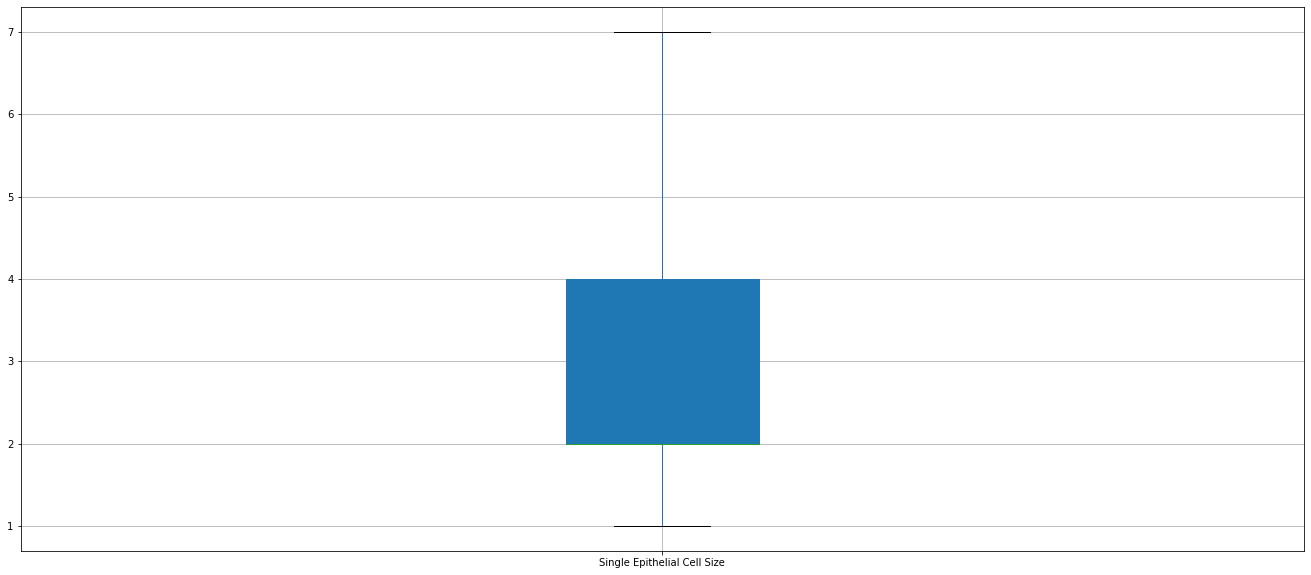

In [253]:
bc_df.boxplot(column=['Single Epithelial Cell Size'],figsize=(23,10),patch_artist=True)

In [255]:
Q1_NN = bc_df['Normal Nucleoli'].quantile(0.25)
Q3_NN = bc_df['Normal Nucleoli'].quantile(0.75)
IQR_NN = Q3_NN - Q1_NN

In [257]:
print("\nLower Whisker value in Normal Nucleoli column is", (Q1_NN - 1.5 * IQR_NN))
print("\nUpper Whisker value in Normal Nucleoli column is", (Q3_NN + 1.5 * IQR_NN))


Lower Whisker value in Normal Nucleoli column is -2.5

Upper Whisker value in Normal Nucleoli column is 9.5


In [258]:
pd.crosstab(bc_df['Normal Nucleoli'],bc_df['Class'])

Class,2,4
Normal Nucleoli,,
1,148,2
2,157,7
3,121,34
4,8,32
5,4,30
6,1,9
7,7,62
8,0,28
9,0,11


In [259]:
print("Number of outliers in Normal Nucleoli column are", ((bc_df['Normal Nucleoli'] < (Q1_NN - 1.5 * IQR_NN)) | (bc_df['Normal Nucleoli'] > (Q3_NN + 1.5 * IQR_NN))).sum())

Number of outliers in Normal Nucleoli column are 20


In [260]:
bc_df['Normal Nucleoli']=np.where(bc_df['Normal Nucleoli']>(Q3_NN + 1.5 * IQR_NN),Q3_NN,bc_df['Normal Nucleoli'])

In [261]:
bc_df['Normal Nucleoli']=np.where(bc_df['Normal Nucleoli']<(Q1_NN - 1.5 * IQR_NN),Q1_NN,bc_df['Normal Nucleoli'])

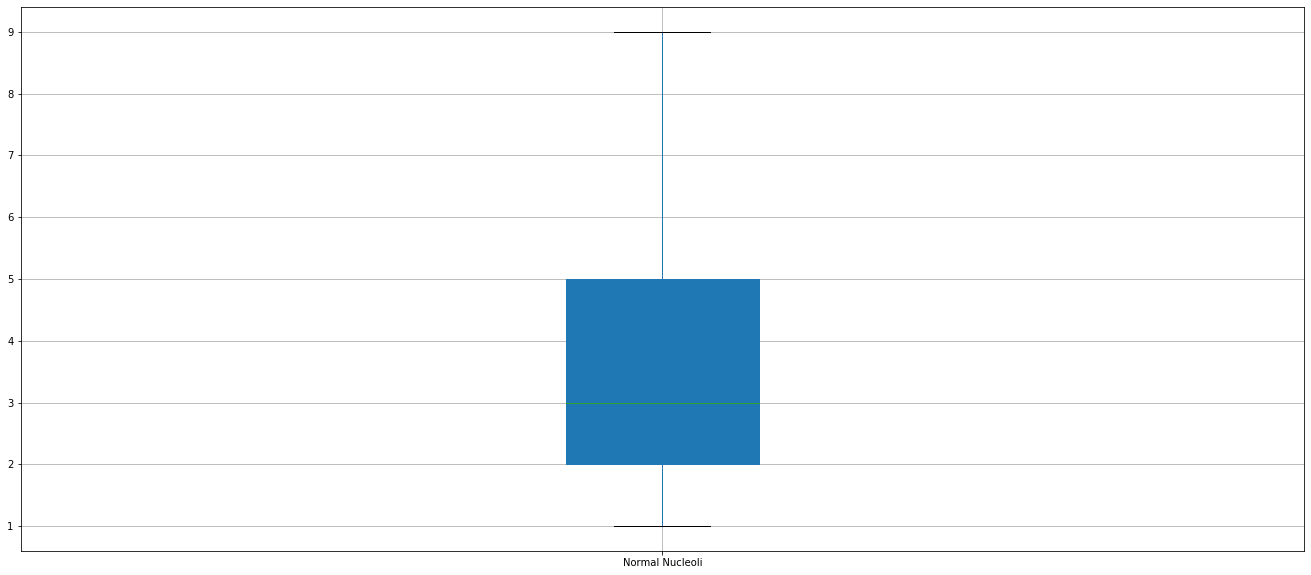

In [262]:
bc_df.boxplot(column=['Normal Nucleoli'],figsize=(23,10),patch_artist=True)

In [263]:
Q1_BC = bc_df['Bland Chromatin'].quantile(0.25)
Q3_BC = bc_df['Bland Chromatin'].quantile(0.75)
IQR_BC = Q3_BC - Q1_BC

In [265]:
print("\nLower Whisker value in Bland Chromatin column is", (Q1_BC - 1.5 * IQR_BC))
print("\nUpper Whisker value in Bland Chromatin column is", (Q3_BC + 1.5 * IQR_BC))


Lower Whisker value in Bland Chromatin column is -3.5

Upper Whisker value in Bland Chromatin column is 8.5


In [264]:
print("Number of outliers in Bland Chromatin column are", ((bc_df['Bland Chromatin'] < (Q1_BC - 1.5 * IQR_BC)) | (bc_df['Bland Chromatin'] > (Q3_BC + 1.5 * IQR_BC))).sum())

Number of outliers in Bland Chromatin column are 77


In [266]:
bc_df['Bland Chromatin']=np.where(bc_df['Bland Chromatin']>(Q3_BC + 1.5 * IQR_BC),Q3_BC,bc_df['Bland Chromatin'])

In [267]:
bc_df['Bland Chromatin']=np.where(bc_df['Bland Chromatin']<(Q1_BC - 1.5 * IQR_BC),Q1_BC,bc_df['Bland Chromatin'])

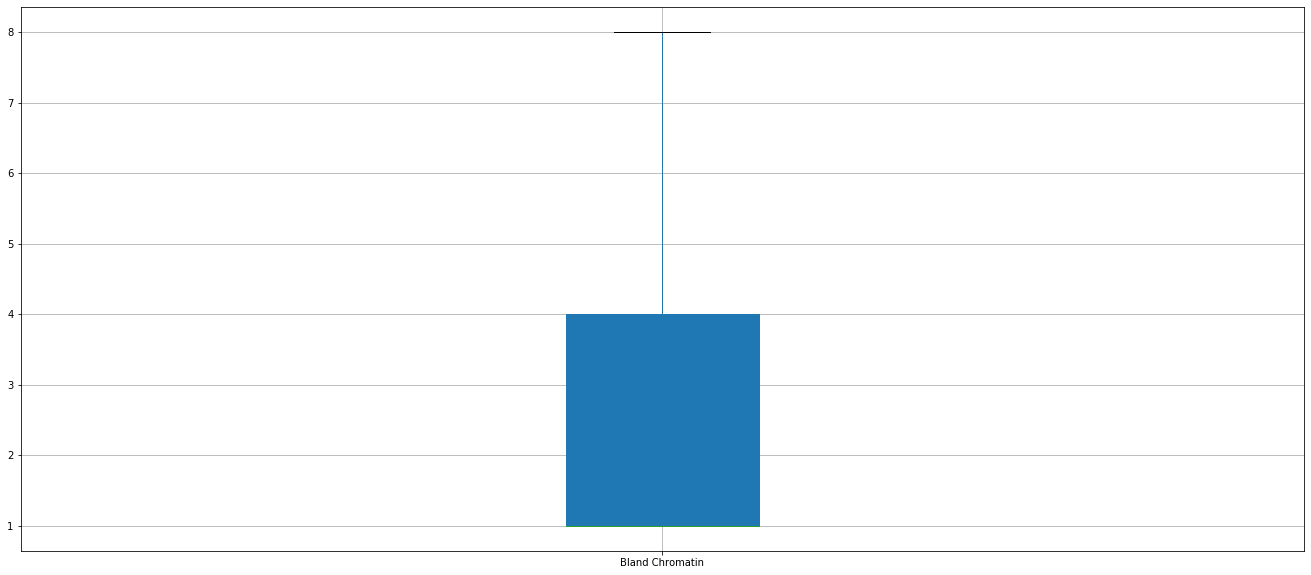

In [268]:
bc_df.boxplot(column=['Bland Chromatin'],figsize=(23,10),patch_artist=True)

In [269]:
Q1_MS = bc_df['Mitoses'].quantile(0.25)
Q3_MS = bc_df['Mitoses'].quantile(0.75)
IQR_MS = Q3_MS - Q1_MS

In [270]:
print("\nLower Whisker value in Mitoses column is", (Q1_MS - 1.5 * IQR_MS))
print("\nUpper Whisker value in Mitoses column is", (Q3_MS + 1.5 * IQR_MS))


Lower Whisker value in Mitoses column is 1.0

Upper Whisker value in Mitoses column is 1.0


In [271]:
print("Number of outliers in Mitoses column are", ((bc_df['Mitoses'] < (Q1_MS - 1.5 * IQR_MS)) | (bc_df['Mitoses'] > (Q3_MS + 1.5 * IQR_MS))).sum())

Number of outliers in Mitoses column are 118


In [272]:
bc_df['Mitoses']=np.where(bc_df['Mitoses']>(Q3_MS + 1.5 * IQR_MS),Q3_MS,bc_df['Mitoses'])

In [273]:
bc_df['Mitoses']=np.where(bc_df['Mitoses']<(Q1_MS - 1.5 * IQR_MS),Q1_MS,bc_df['Mitoses'])

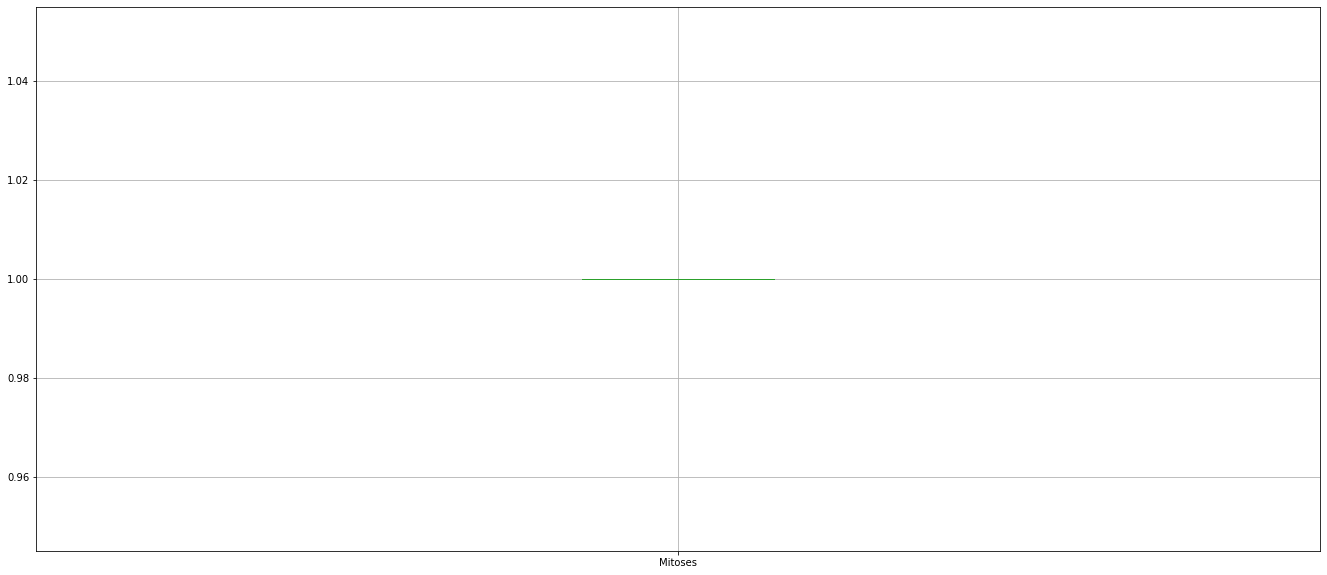

In [274]:
bc_df.boxplot(column=['Mitoses'],figsize=(23,10),patch_artist=True)

In [275]:
pd.crosstab(bc_df['Mitoses'],bc_df['Class'])

Class,2,4
Mitoses,,
1.0,446,235


# Q6 Create a covariance matrix for identifying Principal components

In [280]:
X_ = bc_df.drop(['ID','Class'], axis=1) 
y_ = bc_df["Class"]
X =  X_.to_numpy()
y =  y_.to_numpy()
print(X.shape,y.shape)

(681, 9) (681,)


In [0]:
# PCA
# Step 1 - Create covariance matrix


In [281]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_std = sc.fit_transform(X)  # scale data 

In [282]:
cov_matrix = np.cov(X_std.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00147059 0.64234491 0.65354921 0.49411701 0.53068289 0.59219745
  0.56883285 0.51418194 0.        ]
 [0.64234491 1.00147059 0.90508434 0.70013302 0.7372815  0.68340039
  0.72632498 0.65872955 0.        ]
 [0.65354921 0.90508434 1.00147059 0.66817624 0.71385842 0.70176656
  0.70596452 0.64144947 0.        ]
 [0.49411701 0.70013302 0.66817624 1.00147059 0.64464837 0.65418952
  0.66401973 0.58219912 0.        ]
 [0.53068289 0.7372815  0.71385842 0.64464837 1.00147059 0.62101965
  0.62988371 0.61891183 0.        ]
 [0.59219745 0.68340039 0.70176656 0.65418952 0.62101965 1.00147059
  0.68169965 0.59200926 0.        ]
 [0.56883285 0.72632498 0.70596452 0.66401973 0.62988371 0.68169965
  1.00147059 0.62230463 0.        ]
 [0.51418194 0.65872955 0.64144947 0.58219912 0.61891183 0.59200926
  0.62230463 1.00147059 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [284]:
# Step 2- Get eigen values and eigen vector

In [283]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31547923  0.00967621 -0.83823219 -0.0646922  -0.09347612 -0.17610796
  -0.27908381 -0.27553834  0.        ]
 [ 0.38780753  0.72780281 -0.0336806  -0.01120148  0.37535655  0.28355096
   0.30854623 -0.04641207  0.        ]
 [ 0.38374019 -0.676587   -0.11074882  0.00548005  0.36193532  0.38197027
   0.31952796  0.06067605  0.        ]
 [ 0.34444071 -0.05699501  0.39860916  0.42617601 -0.08340429  0.14110297
  -0.36052473 -0.61705146  0.        ]
 [ 0.35054993 -0.03749756  0.23865167 -0.16322556  0.50367271 -0.51804406
  -0.42334885  0.30138244  0.        ]
 [ 0.35185077  0.07631728 -0.04139003  0.35776854 -0.42798672  0.25814782
  -0.23085868  0.6614806   0.        ]
 [ 0.35708464 -0.04184779  0.0960792   0.19269595 -0.31942074 -0.59988529
   0.60027762 -0.04638093  0.        ]
 [ 0.33164526 -0.01447134  0.23912107 -0.78883507 -0.41656666  0.16703653
  -0.04452026 -0.08337451  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [285]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print("Variance is :", var_exp)

cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("\n\nCumulative Variance Explained", cum_var_exp)

Variance is : [69.39855392560645, 6.801619452865175, 5.5112257974176755, 5.237536528663875, 4.178399379104115, 4.0127756657451785, 3.7040400349515674, 1.1558492156459643, 0.0]


Cumulative Variance Explained [ 69.39855393  76.20017338  81.71139918  86.9489357   91.12733508
  95.14011075  98.84415078 100.         100.        ]


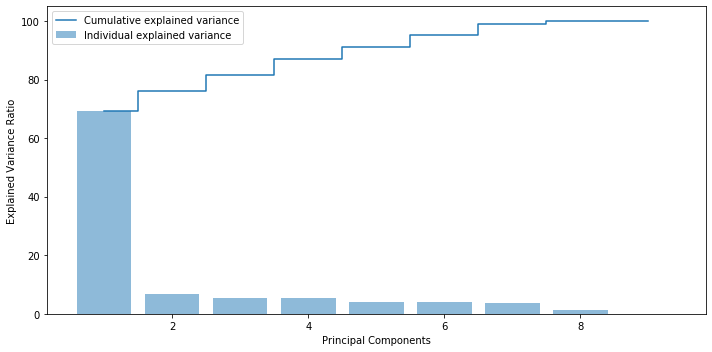

In [286]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [287]:
from sklearn.decomposition import PCA

In [288]:
pca=PCA(n_components=6)
PCA_fit = pca.fit_transform(X_std)

In [289]:
PCA_fit

array([[-1.4413829 ,  0.6123746 , -0.02790635, -0.1896459 , -0.09448058,
         0.21513927],
       [ 2.34182676, -0.93656167, -0.81326013,  0.8887416 ,  2.12718159,
        -1.20011506],
       [-1.56788839,  0.02870536, -0.17295833, -0.24185417, -0.22866701,
        -0.16375596],
       ...,
       [ 4.00795616, -0.77625584,  0.70110771,  2.12752341, -1.28313216,
        -0.39712925],
       [ 2.247293  , -0.87543512,  0.96644027, -0.16214043, -0.82958042,
         0.57302665],
       [ 2.69330406, -0.92021819, -0.04961169,  0.70697476, -0.53992675,
         0.36856574]])

In [294]:
PCA_fit.shape

(681, 6)

In [290]:
pca.components_

array([[ 0.31547923,  0.38780753,  0.38374019,  0.34444071,  0.35054993,
         0.35185077,  0.35708464,  0.33164526, -0.        ],
       [ 0.83823219,  0.0336806 ,  0.11074882, -0.39860916, -0.23865167,
         0.04139003, -0.0960792 , -0.23912107, -0.        ],
       [ 0.0646922 ,  0.01120148, -0.00548005, -0.42617601,  0.16322556,
        -0.35776854, -0.19269595,  0.78883507,  0.        ],
       [-0.09347612,  0.37535655,  0.36193532, -0.08340429,  0.50367271,
        -0.42798672, -0.31942074, -0.41656666,  0.        ],
       [ 0.27908381, -0.30854623, -0.31952796,  0.36052473,  0.42334885,
         0.23085868, -0.60027762,  0.04452026,  0.        ],
       [ 0.27553834,  0.04641207, -0.06067605,  0.61705146, -0.30138244,
        -0.6614806 ,  0.04638093,  0.08337451,  0.        ]])

In [291]:
pca.explained_variance_

array([5.56004885, 0.54492975, 0.44154644, 0.4196191 , 0.33476353,
       0.32149414])

In [292]:
pca.explained_variance_ratio_

array([0.69398554, 0.06801619, 0.05511226, 0.05237537, 0.04178399,
       0.04012776])

# Q10 Find correlation between components and features

In [300]:
pc_df=pd.DataFrame(pca.components_,columns=list(X_))

In [301]:
pc_df.shape

(6, 9)

In [302]:
pc_df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.315479,0.387808,0.383740,0.344441,0.350550,0.351851,0.357085,0.331645,-0.0
1,0.838232,0.033681,0.110749,-0.398609,-0.238652,0.041390,-0.096079,-0.239121,-0.0
2,0.064692,0.011201,-0.005480,-0.426176,0.163226,-0.357769,-0.192696,0.788835,0.0
3,-0.093476,0.375357,0.361935,-0.083404,0.503673,-0.427987,-0.319421,-0.416567,0.0
4,0.279084,-0.308546,-0.319528,0.360525,0.423349,0.230859,-0.600278,0.044520,0.0


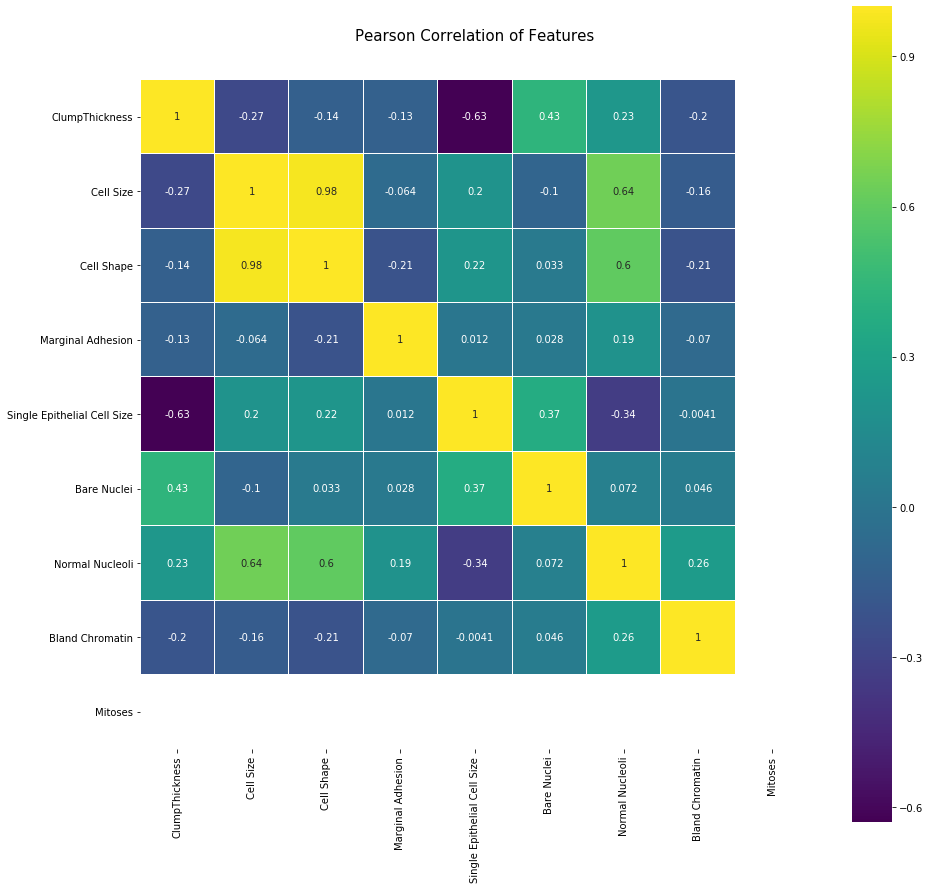

In [305]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pc_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [307]:
jk_df = pd.read_csv("jokes.csv") 
jk_df.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


In [308]:
jk_df.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [309]:
ratings=jk_df.iloc[:200,1:]

In [310]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [311]:
ratings.replace(99,0,inplace=True)

In [313]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [316]:
ratings_diff=ratings.mean()

In [318]:
ratings_diff.head()

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
dtype: float64

In [317]:
ratings_diff.nlargest(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64